In [1]:
# https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/reecewu/Desktop/DAproject/PortfolioStage/DATA ENGINEERING and DATA SCIENCE/application_record.csv')
record = pd.read_csv('/Users/reecewu/Desktop/DAproject/PortfolioStage/DATA ENGINEERING and DATA SCIENCE/credit_record.csv')

In [4]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [5]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
# When users overdue for more than 60 days, we define they are risk users.

record['dep_value'] = None
record.loc[record['STATUS'] == '2', 'dep_value'] = 'Yes'
record.loc[record['STATUS'] == '3', 'dep_value'] = 'Yes'
record.loc[record['STATUS'] == '4', 'dep_value'] = 'Yes'
record.loc[record['STATUS'] == '5', 'dep_value'] = 'Yes'

record.head()

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None


In [7]:
# Find the percentage of risky users

countrisk = record.groupby('ID').count()

countrisk.loc[countrisk['dep_value'] == 0, 'dep_value'] = 0   # safe
countrisk.loc[countrisk['dep_value'] >= 1, 'dep_value'] = 1   # risk

countrisk['dep_value'].value_counts(normalize = True)

0    0.985495
1    0.014505
Name: dep_value, dtype: float64

In [8]:
# Clean null data

newdata = data.copy()

newdata.dropna(inplace = True)

newdata.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [9]:
# merge data

newdata = pd.merge(newdata, countrisk, how = 'inner', on = 'ID')

newdata

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,dep_value
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2,30,30,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1,5,5,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1,5,5,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1,27,27,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1,39,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2,12,12,1
25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2,24,24,1
25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2,33,33,1
25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2,10,10,1


In [10]:
# Clean redundant data and rename columns

newdata = newdata.drop(labels = ['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 
                                 'FLAG_EMAIL', 'MONTHS_BALANCE', 'STATUS'], axis = 1)

newdata.rename(columns = {'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Car', 'FLAG_OWN_REALTY': 'Realty', 
                          'CNT_CHILDREN': 'ChldNo', 'AMT_INCOME_TOTAL': 'Income', 'NAME_INCOME_TYPE': 'Inctype',
                          'NAME_EDUCATION_TYPE': 'Edutype', 'NAME_FAMILY_STATUS': 'Famtype', 
                          'NAME_HOUSING_TYPE': 'Houtype', 'DAYS_BIRTH': 'Age', 'DAYS_EMPLOYED': 'Workyear', 
                          'OCCUPATION_TYPE': 'Occtype', 'CNT_FAM_MEMBERS': 'FamNo', 'dep_value': 'Target'}, inplace = True)

newdata

,Gender,Car,Realty,ChldNo,Income,Inctype,Edutype,Famtype,Houtype,Age,Workyear,Occtype,FamNo,Target
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2,1
25130,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2,1
25131,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2,1
25132,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,Sales staff,2,1


In [11]:
# Create IVtable

IVtable = pd.DataFrame(columns = ['Variable', 'IV'])

## def

In [12]:
# WoE & IV

def cal_woe_iv(data, feature, target):
    df = pd.DataFrame({'variable': feature, 'feature': data[feature], 'target': data[target]})
    
    total_positive = df['target'].sum()
    total_negative = len(df) - total_positive
    
    group_data = df.groupby(['variable', 'feature'])['target'].agg(['count', 'sum']).reset_index()
    group_data.rename(columns = {'count': 'total', 'sum': 'negative'}, inplace = True)
    
    group_data['positive'] = group_data['total'] - group_data['negative']
    group_data['Distribution_good'] = group_data['positive'] / group_data['positive'].sum()
    group_data['Distribution_bad'] = group_data['negative'] / group_data['negative'].sum()
    
    group_data['woe'] = np.log(group_data['Distribution_good'] / group_data['Distribution_bad'])
    group_data = group_data.replace({'woe': {np.inf: 0, -np.inf: 0}})
    
    group_data['iv'] = (group_data['Distribution_good'] - group_data['Distribution_bad']) * group_data['woe']
    
    total_iv = group_data['iv'].sum()
    print('The IV of this variable is', total_iv)
    group_data = group_data.sort_values(by = ['feature'], ascending = True)
    
    return total_iv, group_data

In [13]:
# Discrete data

def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels)
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels)
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df.drop(col, axis = 1, inplace = True)
    return df

In [14]:
# Create dummy

def convert_dummy(df, feature, rank = 0):
    pos = pd.get_dummies(df[feature], prefix = feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest], axis = 1, inplace = True)
    df.drop([feature], axis = 1, inplace = True)
    df = df.join(pos)
    return df

In [15]:
# Key Indicators and Confusion Matrix

def get_confusion(name, cm_test, cm_pred):
    
    metrics =  [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
    results = [name] + [metric(y_test, y_pred) for metric in metrics]

    cm = confusion_matrix(y_test, y_pred, normalize = 'all')

    plt.figure(figsize =(4, 4))
    sns.heatmap(cm, annot = True, cmap = 'Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return results

## Binary Features

In [16]:
# Gender

newdata['Gender'].replace(['F', 'M'], [0, 1], inplace = True)

iv, data_gender = cal_woe_iv(newdata, 'Gender', 'Target')
IVtable.loc[len(IVtable)] = ['Gender', iv]
data_gender

The IV of this variable is 0.02520350452745081


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,Gender,0,15630,230,15400,0.623179,0.545024,0.134005,0.010473
1,Gender,1,9504,192,9312,0.376821,0.454976,-0.188475,0.014730


In [17]:
# Car

newdata['Car'].replace(['N', 'Y'], [0, 1], inplace = True)

iv, data_car = cal_woe_iv(newdata, 'Car', 'Target')
IVtable.loc[len(IVtable)] = ['Car', iv]
data_car

The IV of this variable is 4.54248124999671e-06


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,Car,0,14618,245,14373,0.58162,0.580569,0.00181,0.000002
1,Car,1,10516,177,10339,0.41838,0.419431,-0.00251,0.000003


In [18]:
# Realty

newdata['Realty'].replace(['N', 'Y'], [0, 1], inplace = True)

iv, data_realty = cal_woe_iv(newdata, 'Realty', 'Target')
IVtable.loc[len(IVtable)] = ['Realty', iv]
data_realty

The IV of this variable is 0.02744070350168343


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,Realty,0,8673,179,8494,0.34372,0.424171,-0.210309,0.016920
1,Realty,1,16461,243,16218,0.65628,0.575829,0.130777,0.010521


## Continuous Variables

In [19]:
# ChldNo

newdata.loc[newdata['ChldNo'] >= 2, 'ChldNo'] = '2More'
newdata['ChldNo'] = newdata['ChldNo'].astype(str)

newdata['ChldNo'].value_counts()

0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64

In [20]:
iv, data_chldno = cal_woe_iv(newdata, 'ChldNo', 'Target')
IVtable.loc[len(IVtable)] = ['ChldNo', iv]
data_chldno

The IV of this variable is 0.0011214542503301935


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,ChldNo,0,15908,273,15635,0.632689,0.646919,-0.022243,0.000317
1,ChldNo,1,6118,97,6021,0.243647,0.229858,0.058259,0.000803
2,ChldNo,2More,3108,52,3056,0.123665,0.123223,0.003580,0.000002


In [21]:
newdata = convert_dummy(newdata, 'ChldNo')
newdata.head()

,Gender,Car,Realty,Income,Inctype,Edutype,Famtype,Houtype,Age,Workyear,Occtype,FamNo,Target,ChldNo_1,ChldNo_2More
0,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2,0,0,0
1,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,0
2,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,0
3,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,0
4,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,0


(2.544, 18.18]      14663
(18.18, 33.66]       8464
(33.66, 49.14]       1637
(49.14, 64.62]        175
(64.62, 80.1]         124
(80.1, 95.58]          50
(142.02, 157.5]         8
(126.54, 142.02]        6
(95.58, 111.06]         4
(111.06, 126.54]        3
Name: Income, dtype: int64


<Axes: ylabel='Frequency'>

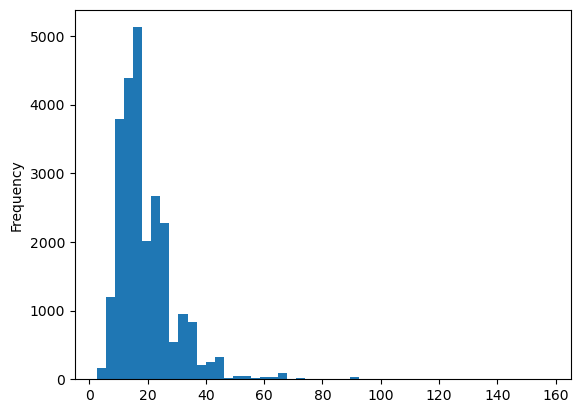

In [22]:
# Income

newdata['Income'] = newdata['Income'] / 10000
print(newdata['Income'].value_counts(bins = 10))
newdata['Income'].plot(kind = 'hist', bins = 50)

In [23]:
newdata = get_category(newdata, 'Income', 3, ['low', 'medium', 'high'], qcut = True)

iv, data_income = cal_woe_iv(newdata, 'gp_Income', 'Target')
IVtable.loc[len(IVtable)] = ['gp_Income', iv]
data_income

The IV of this variable is 0.0024219962221596752


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,gp_Income,low,8996,147,8849,0.358085,0.348341,0.027588,0.000269
1,gp_Income,medium,7894,127,7767,0.314301,0.300948,0.043413,0.000580
2,gp_Income,high,8244,148,8096,0.327614,0.350711,-0.068126,0.001573


In [24]:
newdata = convert_dummy(newdata, 'gp_Income')
newdata.head()

,Gender,Car,Realty,Inctype,Edutype,Famtype,Houtype,Age,Workyear,Occtype,FamNo,Target,ChldNo_1,ChldNo_2More,gp_Income_medium,gp_Income_high
0,1,1,1,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2,0,0,0,0,0
1,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,0,0,1
2,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,0,0,1
3,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,0,0,1
4,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,0,0,0,0,1


(38.8, 43.5]                  4350
(29.4, 34.1]                  4267
(43.5, 48.2]                  3566
(34.1, 38.8]                  3539
(24.7, 29.4]                  3375
(48.2, 52.9]                  2490
(52.9, 57.6]                  1924
(57.6, 62.3]                   819
(19.951999999999998, 24.7]     630
(62.3, 67.0]                   174
Name: Age, dtype: int64


<Axes: ylabel='Frequency'>

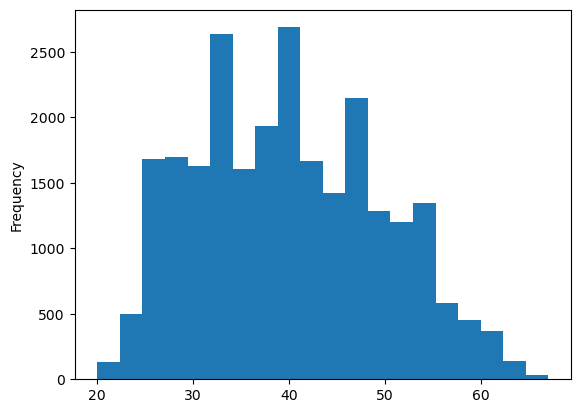

In [25]:
# Age

newdata['Age'] = newdata['Age'] // -365
print(newdata['Age'].value_counts(bins = 10))
newdata['Age'].plot(kind = 'hist', bins = 20)

In [26]:
newdata = get_category(newdata, 'Age', 5, ['very low', 'low', 'medium', 'high', 'very high'])

iv, data_income = cal_woe_iv(newdata, 'gp_Age', 'Target')
IVtable.loc[len(IVtable)] = ['gp_Age', iv]
data_income

The IV of this variable is 0.06593513858884346


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,gp_Age,very low,4005,84,3921,0.158668,0.199052,-0.226754,0.009157
1,gp_Age,low,7806,120,7686,0.311023,0.284360,0.089625,0.002390
2,gp_Age,medium,7916,123,7793,0.315353,0.291469,0.078758,0.001881
3,gp_Age,high,4414,91,4323,0.174935,0.215640,-0.209194,0.008515
4,gp_Age,very high,993,4,989,0.040021,0.009479,1.440361,0.043992


In [27]:
newdata = convert_dummy(newdata, 'gp_Age')
newdata.head()

,Gender,Car,Realty,Inctype,Edutype,Famtype,Houtype,Workyear,Occtype,FamNo,Target,ChldNo_1,ChldNo_2More,gp_Income_medium,gp_Income_high,gp_Age_very low,gp_Age_low,gp_Age_high,gp_Age_very high
0,1,1,1,Working,Secondary / secondary special,Married,House / apartment,-1134,Security staff,2,0,0,0,0,0,0,0,0,1
1,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1,0,0,0,0,1,0,0,1,0
2,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1,0,0,0,0,1,0,0,1,0
3,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1,0,0,0,0,1,0,0,1,0
4,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,Sales staff,1,0,0,0,0,1,0,0,1,0


(-0.044, 4.3]    11978
(4.3, 8.6]        6276
(8.6, 12.9]       3156
(12.9, 17.2]      1831
(17.2, 21.5]       853
(21.5, 25.8]       525
(25.8, 30.1]       288
(30.1, 34.4]       137
(34.4, 38.7]        58
(38.7, 43.0]        32
Name: Workyear, dtype: int64


<Axes: ylabel='Frequency'>

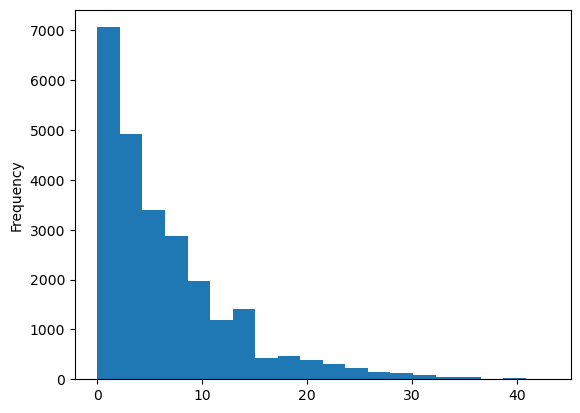

In [28]:
# Workyear

newdata['Workyear'] = newdata['Workyear'] // -365
print(newdata['Workyear'].value_counts(bins = 10))
newdata['Workyear'].plot(kind = 'hist', bins = 20)

In [29]:
newdata = get_category(newdata, 'Workyear', 5, ['very low', 'low', 'medium', 'high', 'very high'])

iv, data_income = cal_woe_iv(newdata, 'gp_Workyear', 'Target')
IVtable.loc[len(IVtable)] = ['gp_Workyear', iv]
data_income

The IV of this variable is 0.04022152230816303


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,gp_Workyear,very low,18254,338,17916,0.724992,0.800948,-0.099635,0.007568
1,gp_Workyear,low,4987,66,4921,0.199134,0.156398,0.241573,0.010324
2,gp_Workyear,medium,1378,16,1362,0.055115,0.037915,0.374082,0.006434
3,gp_Workyear,high,425,2,423,0.017117,0.004739,1.284186,0.015895
4,gp_Workyear,very high,90,0,90,0.003642,0.000000,0.000000,0.000000


In [30]:
newdata = convert_dummy(newdata, 'gp_Workyear')
newdata.head()

,Gender,Car,Realty,Inctype,Edutype,Famtype,Houtype,Occtype,FamNo,Target,...,gp_Income_medium,gp_Income_high,gp_Age_very low,gp_Age_low,gp_Age_high,gp_Age_very high,gp_Workyear_low,gp_Workyear_medium,gp_Workyear_high,gp_Workyear_very high
0,1,1,1,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,0,...,0,1,0,0,1,0,0,0,0,0


In [31]:
# FamNo

newdata.loc[newdata['FamNo'] >= 4, 'FamNo'] = '4More'
newdata['FamNo'] = newdata['FamNo'].astype(str)
newdata['FamNo'].value_counts()

2        12697
3         5216
1         4263
4More     2958
Name: FamNo, dtype: int64

In [32]:
iv, data_FamNo = cal_woe_iv(newdata, 'FamNo', 'Target')
IVtable.loc[len(IVtable)] = ['FamNo', iv]
data_FamNo

The IV of this variable is 0.006232369824468111


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,FamNo,1,4263,84,4179,0.169108,0.199052,-0.163028,0.004882
1,FamNo,2,12697,208,12489,0.505382,0.492891,0.025027,0.000313
2,FamNo,3,5216,82,5134,0.207753,0.194313,0.066882,0.000899
3,FamNo,4More,2958,48,2910,0.117757,0.113744,0.034668,0.000139


In [33]:
newdata = convert_dummy(newdata, 'FamNo')
newdata.head()

,Gender,Car,Realty,Inctype,Edutype,Famtype,Houtype,Occtype,Target,ChldNo_1,...,gp_Age_low,gp_Age_high,gp_Age_very high,gp_Workyear_low,gp_Workyear_medium,gp_Workyear_high,gp_Workyear_very high,FamNo_1,FamNo_3,FamNo_4More
0,1,1,1,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,...,0,1,0,0,0,0,0,1,0,0


## Categorical Features

In [34]:
# Inctype

print(newdata['Inctype'].value_counts(), '\n')
newdata.loc[newdata['Inctype'] == 'Pensioner', 'Inctype'] = 'State servant'
newdata.loc[newdata['Inctype'] == 'Student', 'Inctype'] = 'State servant'

iv, data_Inctype = cal_woe_iv(newdata, 'Inctype', 'Target')
IVtable.loc[len(IVtable)] = ['Inctype', iv]
data_Inctype

Working                 15622
Commercial associate     7052
State servant            2437
Pensioner                  13
Student                    10
Name: Inctype, dtype: int64 

The IV of this variable is 5.159303327851404e-05


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,Inctype,Commercial associate,7052,119,6933,0.280552,0.281991,-0.005115,0.000007
1,Inctype,State servant,2460,42,2418,0.097847,0.099526,-0.017013,0.000029
2,Inctype,Working,15622,261,15361,0.621601,0.618483,0.005028,0.000016


In [35]:
newdata = convert_dummy(newdata, 'Inctype')
newdata.head()

,Gender,Car,Realty,Edutype,Famtype,Houtype,Occtype,Target,ChldNo_1,ChldNo_2More,...,gp_Age_very high,gp_Workyear_low,gp_Workyear_medium,gp_Workyear_high,gp_Workyear_very high,FamNo_1,FamNo_3,FamNo_4More,Inctype_Commercial associate,Inctype_State servant
0,1,1,1,Secondary / secondary special,Married,House / apartment,Security staff,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [36]:
# Edutype

print(newdata['Edutype'].value_counts(), '\n')
newdata.loc[newdata['Edutype'] == 'Academic degree', 'Edutype'] = 'Higher education'

iv, data_Edutype = cal_woe_iv(newdata, 'Edutype', 'Target')
IVtable.loc[len(IVtable)] = ['Edutype', iv]
data_Edutype

Secondary / secondary special    16808
Higher education                  7132
Incomplete higher                  993
Lower secondary                    187
Academic degree                     14
Name: Edutype, dtype: int64 

The IV of this variable is 0.010361794017679489


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,Edutype,Higher education,7146,128,7018,0.283992,0.303318,-0.065836,0.001272
1,Edutype,Incomplete higher,993,21,972,0.039333,0.049763,-0.235206,0.002453
2,Edutype,Lower secondary,187,6,181,0.007324,0.014218,-0.663301,0.004573
3,Edutype,Secondary / secondary special,16808,267,16541,0.669351,0.632701,0.056310,0.002064


In [37]:
newdata = convert_dummy(newdata, 'Edutype')
newdata.head()

,Gender,Car,Realty,Famtype,Houtype,Occtype,Target,ChldNo_1,ChldNo_2More,gp_Income_medium,...,gp_Workyear_high,gp_Workyear_very high,FamNo_1,FamNo_3,FamNo_4More,Inctype_Commercial associate,Inctype_State servant,Edutype_Higher education,Edutype_Incomplete higher,Edutype_Lower secondary
0,1,1,1,Married,House / apartment,Security staff,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,Single / not married,House / apartment,Sales staff,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,Single / not married,House / apartment,Sales staff,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,1,Single / not married,House / apartment,Sales staff,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,1,Single / not married,House / apartment,Sales staff,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [38]:
# Famtype

print(newdata['Famtype'].value_counts(), '\n')

iv ,data_Famtype = cal_woe_iv(newdata, 'Famtype', 'Target')
IVtable.loc[len(IVtable)] = ['Famtype', iv]
data_Famtype

Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: Famtype, dtype: int64 

The IV of this variable is 0.043137115423127946


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,Famtype,Civil marriage,2133,32,2101,0.085019,0.075829,0.114394,0.001051
1,Famtype,Married,17509,277,17232,0.697313,0.656398,0.060467,0.002474
2,Famtype,Separated,1467,15,1452,0.058757,0.035545,0.502608,0.011666
3,Famtype,Single / not married,3445,83,3362,0.136047,0.196682,-0.368588,0.022349
4,Famtype,Widow,580,15,565,0.022863,0.035545,-0.441263,0.005596


In [39]:
newdata = convert_dummy(newdata, 'Famtype')
newdata.head()

,Gender,Car,Realty,Houtype,Occtype,Target,ChldNo_1,ChldNo_2More,gp_Income_medium,gp_Income_high,...,FamNo_4More,Inctype_Commercial associate,Inctype_State servant,Edutype_Higher education,Edutype_Incomplete higher,Edutype_Lower secondary,Famtype_Civil marriage,Famtype_Separated,Famtype_Single / not married,Famtype_Widow
0,1,1,1,House / apartment,Security staff,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,House / apartment,Sales staff,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,House / apartment,Sales staff,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,House / apartment,Sales staff,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,House / apartment,Sales staff,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [40]:
# Houtype

print(newdata['Houtype'].value_counts(), '\n')

iv, data_Houtype = cal_woe_iv(newdata, 'Houtype', 'Target')
IVtable.loc[len(IVtable)] = ['Houtype', iv]
data_Houtype

House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: Houtype, dtype: int64 

The IV of this variable is 0.0073275026880227365


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,Houtype,Co-op apartment,152,3,149,0.006029,0.007109,-0.164705,0.000178
1,Houtype,House / apartment,22102,364,21738,0.879654,0.862559,0.019624,0.000335
2,Houtype,Municipal apartment,812,19,793,0.032090,0.045024,-0.338655,0.004380
3,Houtype,Office apartment,199,5,194,0.007850,0.011848,-0.411619,0.001646
4,Houtype,Rented apartment,439,6,433,0.017522,0.014218,0.208939,0.000690
5,Houtype,With parents,1430,25,1405,0.056855,0.059242,-0.041122,0.000098


In [41]:
newdata = convert_dummy(newdata, 'Houtype')
newdata.head()

,Gender,Car,Realty,Occtype,Target,ChldNo_1,ChldNo_2More,gp_Income_medium,gp_Income_high,gp_Age_very low,...,Edutype_Lower secondary,Famtype_Civil marriage,Famtype_Separated,Famtype_Single / not married,Famtype_Widow,Houtype_Co-op apartment,Houtype_Municipal apartment,Houtype_Office apartment,Houtype_Rented apartment,Houtype_With parents
0,1,1,1,Security staff,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,Sales staff,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,Sales staff,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,Sales staff,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,Sales staff,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
# Occtype

print(newdata['Occtype'].value_counts(), '\n')
newdata.loc[(newdata['Occtype'] == 'Laborers') | 
            (newdata['Occtype'] == 'Drivers') | 
            (newdata['Occtype'] == 'Cleaning staff') | 
            (newdata['Occtype'] == 'Low-skill Laborers') | 
            (newdata['Occtype'] == 'Waiters/barmen staff'), 'Occtype'] = 'labor'
newdata.loc[(newdata['Occtype'] == 'Sales staff') | 
            (newdata['Occtype'] == 'Accountants') | 
            (newdata['Occtype'] == 'Medicine staff') | 
            (newdata['Occtype'] == 'Private service staff') | 
            (newdata['Occtype'] == 'HR staff') |
            (newdata['Occtype'] == 'Cooking staff') | 
            (newdata['Occtype'] == 'Security staff') |
            (newdata['Occtype'] == 'Realty agents') | 
            (newdata['Occtype'] == 'Secretaries') |
            (newdata['Occtype'] == 'IT staff'), 'Occtype'] = 'general staff'
newdata.loc[(newdata['Occtype'] == 'Core staff') | 
            (newdata['Occtype'] == 'Managers') | 
            (newdata['Occtype'] == 'High skill tech staff'), 'Occtype'] = 'senior staff'

iv, data_Occtype = cal_woe_iv(newdata, 'Occtype', 'Target')
IVtable.loc[len(IVtable)] = ['Occtype', iv]
data_Occtype

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: Occtype, dtype: int64 

The IV of this variable is 0.018224563938151955


,variable,feature,total,negative,positive,Distribution_good,Distribution_bad,woe,iv
0,Occtype,general staff,7899,108,7791,0.315272,0.255924,0.208554,0.012377
1,Occtype,labor,9249,163,9086,0.367676,0.386256,-0.049299,0.000916
2,Occtype,senior staff,7986,151,7835,0.317052,0.357820,-0.120963,0.004931


In [43]:
newdata = convert_dummy(newdata, 'Occtype')
newdata.head()

,Gender,Car,Realty,Target,ChldNo_1,ChldNo_2More,gp_Income_medium,gp_Income_high,gp_Age_very low,gp_Age_low,...,Famtype_Separated,Famtype_Single / not married,Famtype_Widow,Houtype_Co-op apartment,Houtype_Municipal apartment,Houtype_Office apartment,Houtype_Rented apartment,Houtype_With parents,Occtype_general staff,Occtype_senior staff
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [44]:
IVtable.sort_values(by = 'IV', ascending = False)

# The definition of IV values ranges as follows:
#    < 0.02: The feature has no predictive power.
#    0.02 − 0.1: Low predictive power.
#    0.1 − 0.3: Moderate predictive power.
#    0.3 − 0.5: High predictive power.
#    > 0.5: Very high predictive power.

,Variable,IV
5,gp_Age,0.065935
10,Famtype,0.043137
6,gp_Workyear,0.040222
2,Realty,0.027441
0,Gender,0.025204
12,Occtype,0.018225
9,Edutype,0.010362
11,Houtype,0.007328
7,FamNo,0.006232
4,gp_Income,0.002422


## Algorithms

In [45]:
newdata.columns

Index(['Gender', 'Car', 'Realty', 'Target', 'ChldNo_1', 'ChldNo_2More',
       'gp_Income_medium', 'gp_Income_high', 'gp_Age_very low', 'gp_Age_low',
       'gp_Age_high', 'gp_Age_very high', 'gp_Workyear_low',
       'gp_Workyear_medium', 'gp_Workyear_high', 'gp_Workyear_very high',
       'FamNo_1', 'FamNo_3', 'FamNo_4More', 'Inctype_Commercial associate',
       'Inctype_State servant', 'Edutype_Higher education',
       'Edutype_Incomplete higher', 'Edutype_Lower secondary',
       'Famtype_Civil marriage', 'Famtype_Separated',
       'Famtype_Single / not married', 'Famtype_Widow',
       'Houtype_Co-op apartment', 'Houtype_Municipal apartment',
       'Houtype_Office apartment', 'Houtype_Rented apartment',
       'Houtype_With parents', 'Occtype_general staff',
       'Occtype_senior staff'],
      dtype='object')

In [46]:
# Feature column X and target column Y

y = newdata['Target']
X = newdata[['Gender', 'Car', 'Realty', 'ChldNo_1', 'ChldNo_2More',
       'gp_Income_medium', 'gp_Income_high', 'gp_Age_very low', 'gp_Age_low',
       'gp_Age_high', 'gp_Age_very high', 'gp_Workyear_low',
       'gp_Workyear_medium', 'gp_Workyear_high', 'gp_Workyear_very high',
       'FamNo_1', 'FamNo_3', 'FamNo_4More', 'Inctype_Commercial associate',
       'Inctype_State servant', 'Edutype_Higher education',
       'Edutype_Incomplete higher', 'Edutype_Lower secondary',
       'Famtype_Civil marriage', 'Famtype_Separated',
       'Famtype_Single / not married', 'Famtype_Widow',
       'Houtype_Co-op apartment', 'Houtype_Municipal apartment',
       'Houtype_Office apartment', 'Houtype_Rented apartment',
       'Houtype_With parents', 'Occtype_general staff',
       'Occtype_senior staff']]

In [47]:
# Create test set and training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# Use oversampling or undersampling

from imblearn.over_sampling import SMOTE

X_balance, y_balance = SMOTE().fit_resample(X, y)

In [49]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_balance_scaled = scaler.fit_transform(X_balance)
X_test_scaled = scaler.fit_transform(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [51]:
# Create Model comparison table

model_result = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

## Logistic Regression

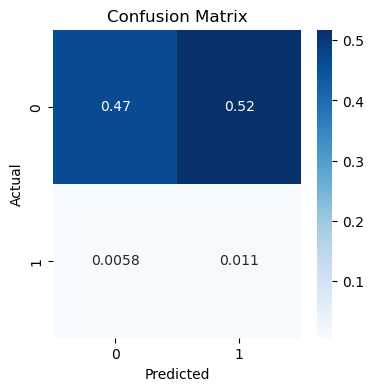

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.476626,0.021437,0.662791,0.04153,0.568088


In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)
model.fit(X_balance_scaled, y_balance)

y_pred = model.predict(X_test_scaled)

results = get_confusion('Logistic Regression', y_test, y_pred)
model_result.loc[len(model_result)] = results
model_result

## Decision Tree

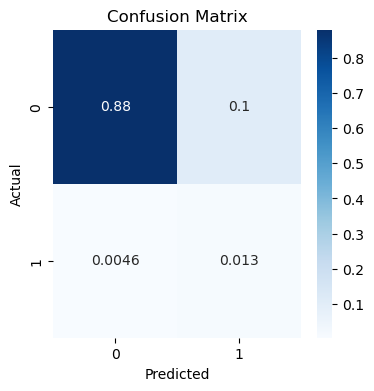

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.476626,0.021437,0.662791,0.04153,0.568088
1,Decision Tree,0.891387,0.107509,0.732558,0.18750,0.813355


In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_balance_scaled, y_balance)

y_pred = model.predict(X_test_scaled)

results = get_confusion('Decision Tree', y_test, y_pred)
model_result.loc[len(model_result)] = results
model_result

## Random Forest

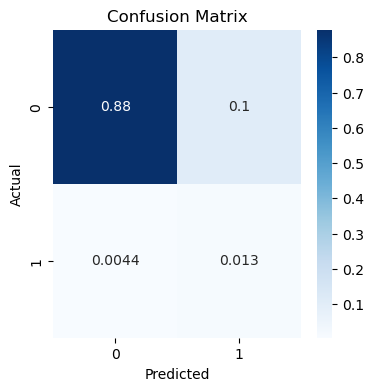

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.476626,0.021437,0.662791,0.04153,0.568088
1,Decision Tree,0.891387,0.107509,0.732558,0.18750,0.813355
2,Random Forest,0.891188,0.108659,0.744186,0.18963,0.818966


In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_balance_scaled, y_balance)

y_pred = model.predict(X_test_scaled)

results = get_confusion('Random Forest', y_test, y_pred)
model_result.loc[len(model_result)] = results
model_result

## SVM

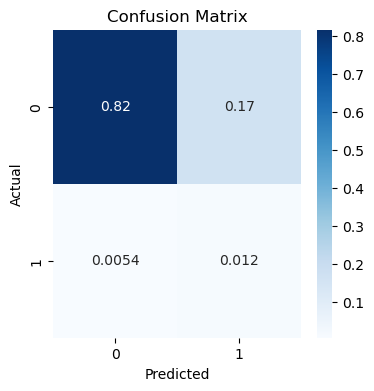

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.476626,0.021437,0.662791,0.041530,0.568088
1,Decision Tree,0.891387,0.107509,0.732558,0.187500,0.813355
2,Random Forest,0.891188,0.108659,0.744186,0.189630,0.818966
3,SVM,0.827929,0.065775,0.686047,0.120041,0.758223


In [55]:
from sklearn.svm import SVC

model = SVC(random_state = 42)
model.fit(X_balance_scaled, y_balance)

y_pred = model.predict(X_test_scaled)

results = get_confusion('SVM', y_test, y_pred)
model_result.loc[len(model_result)] = results
model_result

## LightGBM

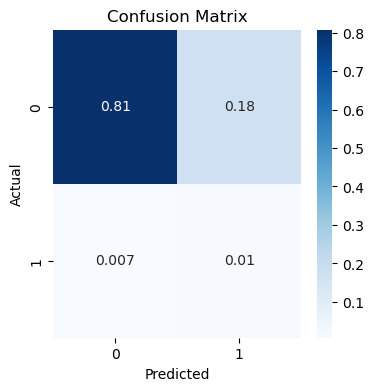

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.476626,0.021437,0.662791,0.041530,0.568088
1,Decision Tree,0.891387,0.107509,0.732558,0.187500,0.813355
2,Random Forest,0.891188,0.108659,0.744186,0.189630,0.818966
3,SVM,0.827929,0.065775,0.686047,0.120041,0.758223
4,LightGBM,0.817585,0.054662,0.593023,0.100098,0.707258


In [56]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state = 42, verbosity = -1)
model.fit(X_balance_scaled, y_balance)

y_pred = model.predict(X_test_scaled)

results = get_confusion('LightGBM', y_test, y_pred)
model_result.loc[len(model_result)] = results
model_result

## Xgboost

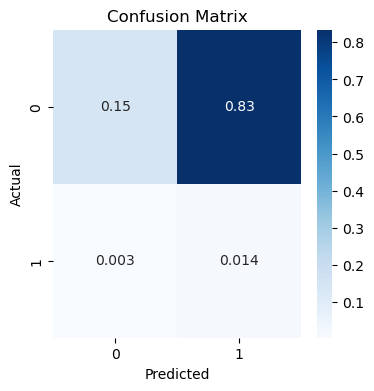

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.476626,0.021437,0.662791,0.041530,0.568088
1,Decision Tree,0.891387,0.107509,0.732558,0.187500,0.813355
2,Random Forest,0.891188,0.108659,0.744186,0.189630,0.818966
3,SVM,0.827929,0.065775,0.686047,0.120041,0.758223
4,LightGBM,0.817585,0.054662,0.593023,0.100098,0.707258
5,Xgboost,0.162920,0.016651,0.825581,0.032644,0.488484


In [57]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
model.fit(X_balance_scaled, y_balance)

y_pred = model.predict(X_test_scaled)

results = get_confusion('Xgboost', y_test, y_pred)
model_result.loc[len(model_result)] = results
model_result

## CatBoost

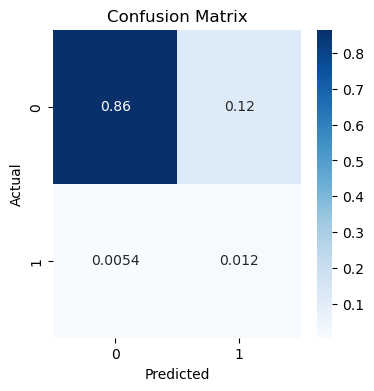

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.476626,0.021437,0.662791,0.041530,0.568088
1,Decision Tree,0.891387,0.107509,0.732558,0.187500,0.813355
2,Random Forest,0.891188,0.108659,0.744186,0.189630,0.818966
3,SVM,0.827929,0.065775,0.686047,0.120041,0.758223
4,LightGBM,0.817585,0.054662,0.593023,0.100098,0.707258
5,Xgboost,0.162920,0.016651,0.825581,0.032644,0.488484
6,CatBoost,0.876268,0.090214,0.686047,0.159459,0.782813


In [58]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state = 42, verbose = False)
model.fit(X_balance_scaled, y_balance)

y_pred = model.predict(X_test_scaled)

results = get_confusion('CatBoost', y_test, y_pred)
model_result.loc[len(model_result)] = results
model_result